In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('sort.csv')
print(df)

program     size  entropy  time (ns)
0    inferray       10      0.1    2454100
1    inferray       10      0.2      11800
2    inferray       10      0.5       7500
3    inferray       10      1.0      12500
4    inferray       50      0.1      18100
5    inferray       50      0.2      32700
6    inferray       50      0.5      23900
7    inferray       50      1.0      32700
8    inferray      100      0.1      46300
9    inferray      100      0.2      44200
10   inferray      100      0.5      39800
11   inferray      100      1.0      51300
12   inferray      500      0.1     236400
13   inferray      500      0.2     118600
14   inferray      500      0.5      95000
15   inferray      500      1.0     195700
16   inferray     1000      0.1     585800
17   inferray     1000      0.2     205200
18   inferray     1000      0.5     184700
19   inferray     1000      1.0     285900
20   inferray    10000      0.1    2658300
21   inferray    10000      0.2    2049800
22   inferray    

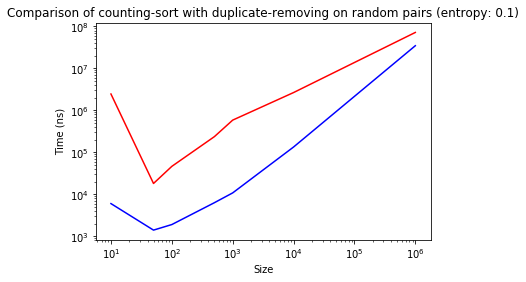

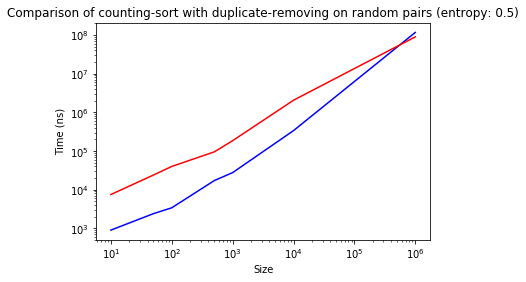

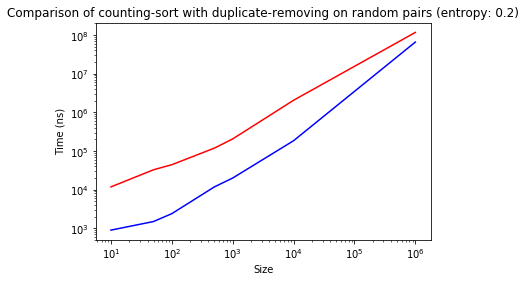

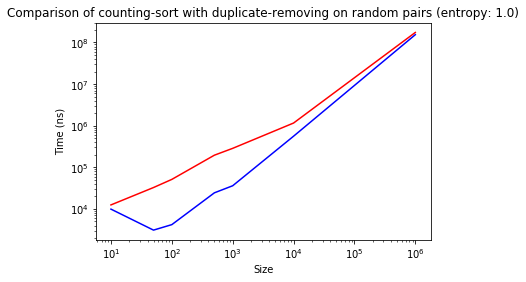

In [11]:
progs = list(set(df['program']))
for ent in set(df['entropy']):
    data_raw = df[df['entropy']==ent]
    data = {}
    for prog in progs:
        data[prog] = data_raw[data_raw['program']==prog]
    plt.figure(str(ent))
    plt.title('Comparison of counting-sort with duplicate-removing on random pairs arrray (entropy: '+ str(ent) + ')')
    plt.plot(data[progs[0]]['size'],data[progs[0]]['time (ns)'],'b',data[progs[1]]['size'],data[progs[1]]['time (ns)'], 'r')
    plt.xscale('log')
    plt.xlabel('Size')
    plt.yscale('log')
    plt.ylabel('Time (ns)')
    plt.autoscale()